In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

ModuleNotFoundError: No module named 'plotly'

In [4]:
# Read the Excel file
Monday_df = pd.read_excel(r'C:\Users\khurram\Desktop\NCBC\K-Means\Data\Data (Manuscript)\Monday.xlsx') 

print(Monday_df.head())

   Ref Time  Vehicles Count\ minute  Avg Speed\ minute  Cars  Car Avg Speed  \
0  09:00:00                      21          63.643365    20      62.833940   
1  09:01:00                      21          46.768528    19      50.314038   
2  09:02:00                      18          53.414976    19      53.414976   
3  09:03:00                      15          55.085130    13      54.660569   
4  09:04:00                      13          70.354436    12      72.637627   

   Motorbike  Bike Avg Speed   Bicycle  Bicycle Avg Speed  Bus  Bus Avg Speed  
0          1        63.240299        0                0.0    0            0.0  
1          2         9.085823        0                0.0    0            0.0  
2          0         0.000000        0                0.0    0            0.0  
3          2        57.844776        0                0.0    0            0.0  
4          1        42.956146        0                0.0    0            0.0  


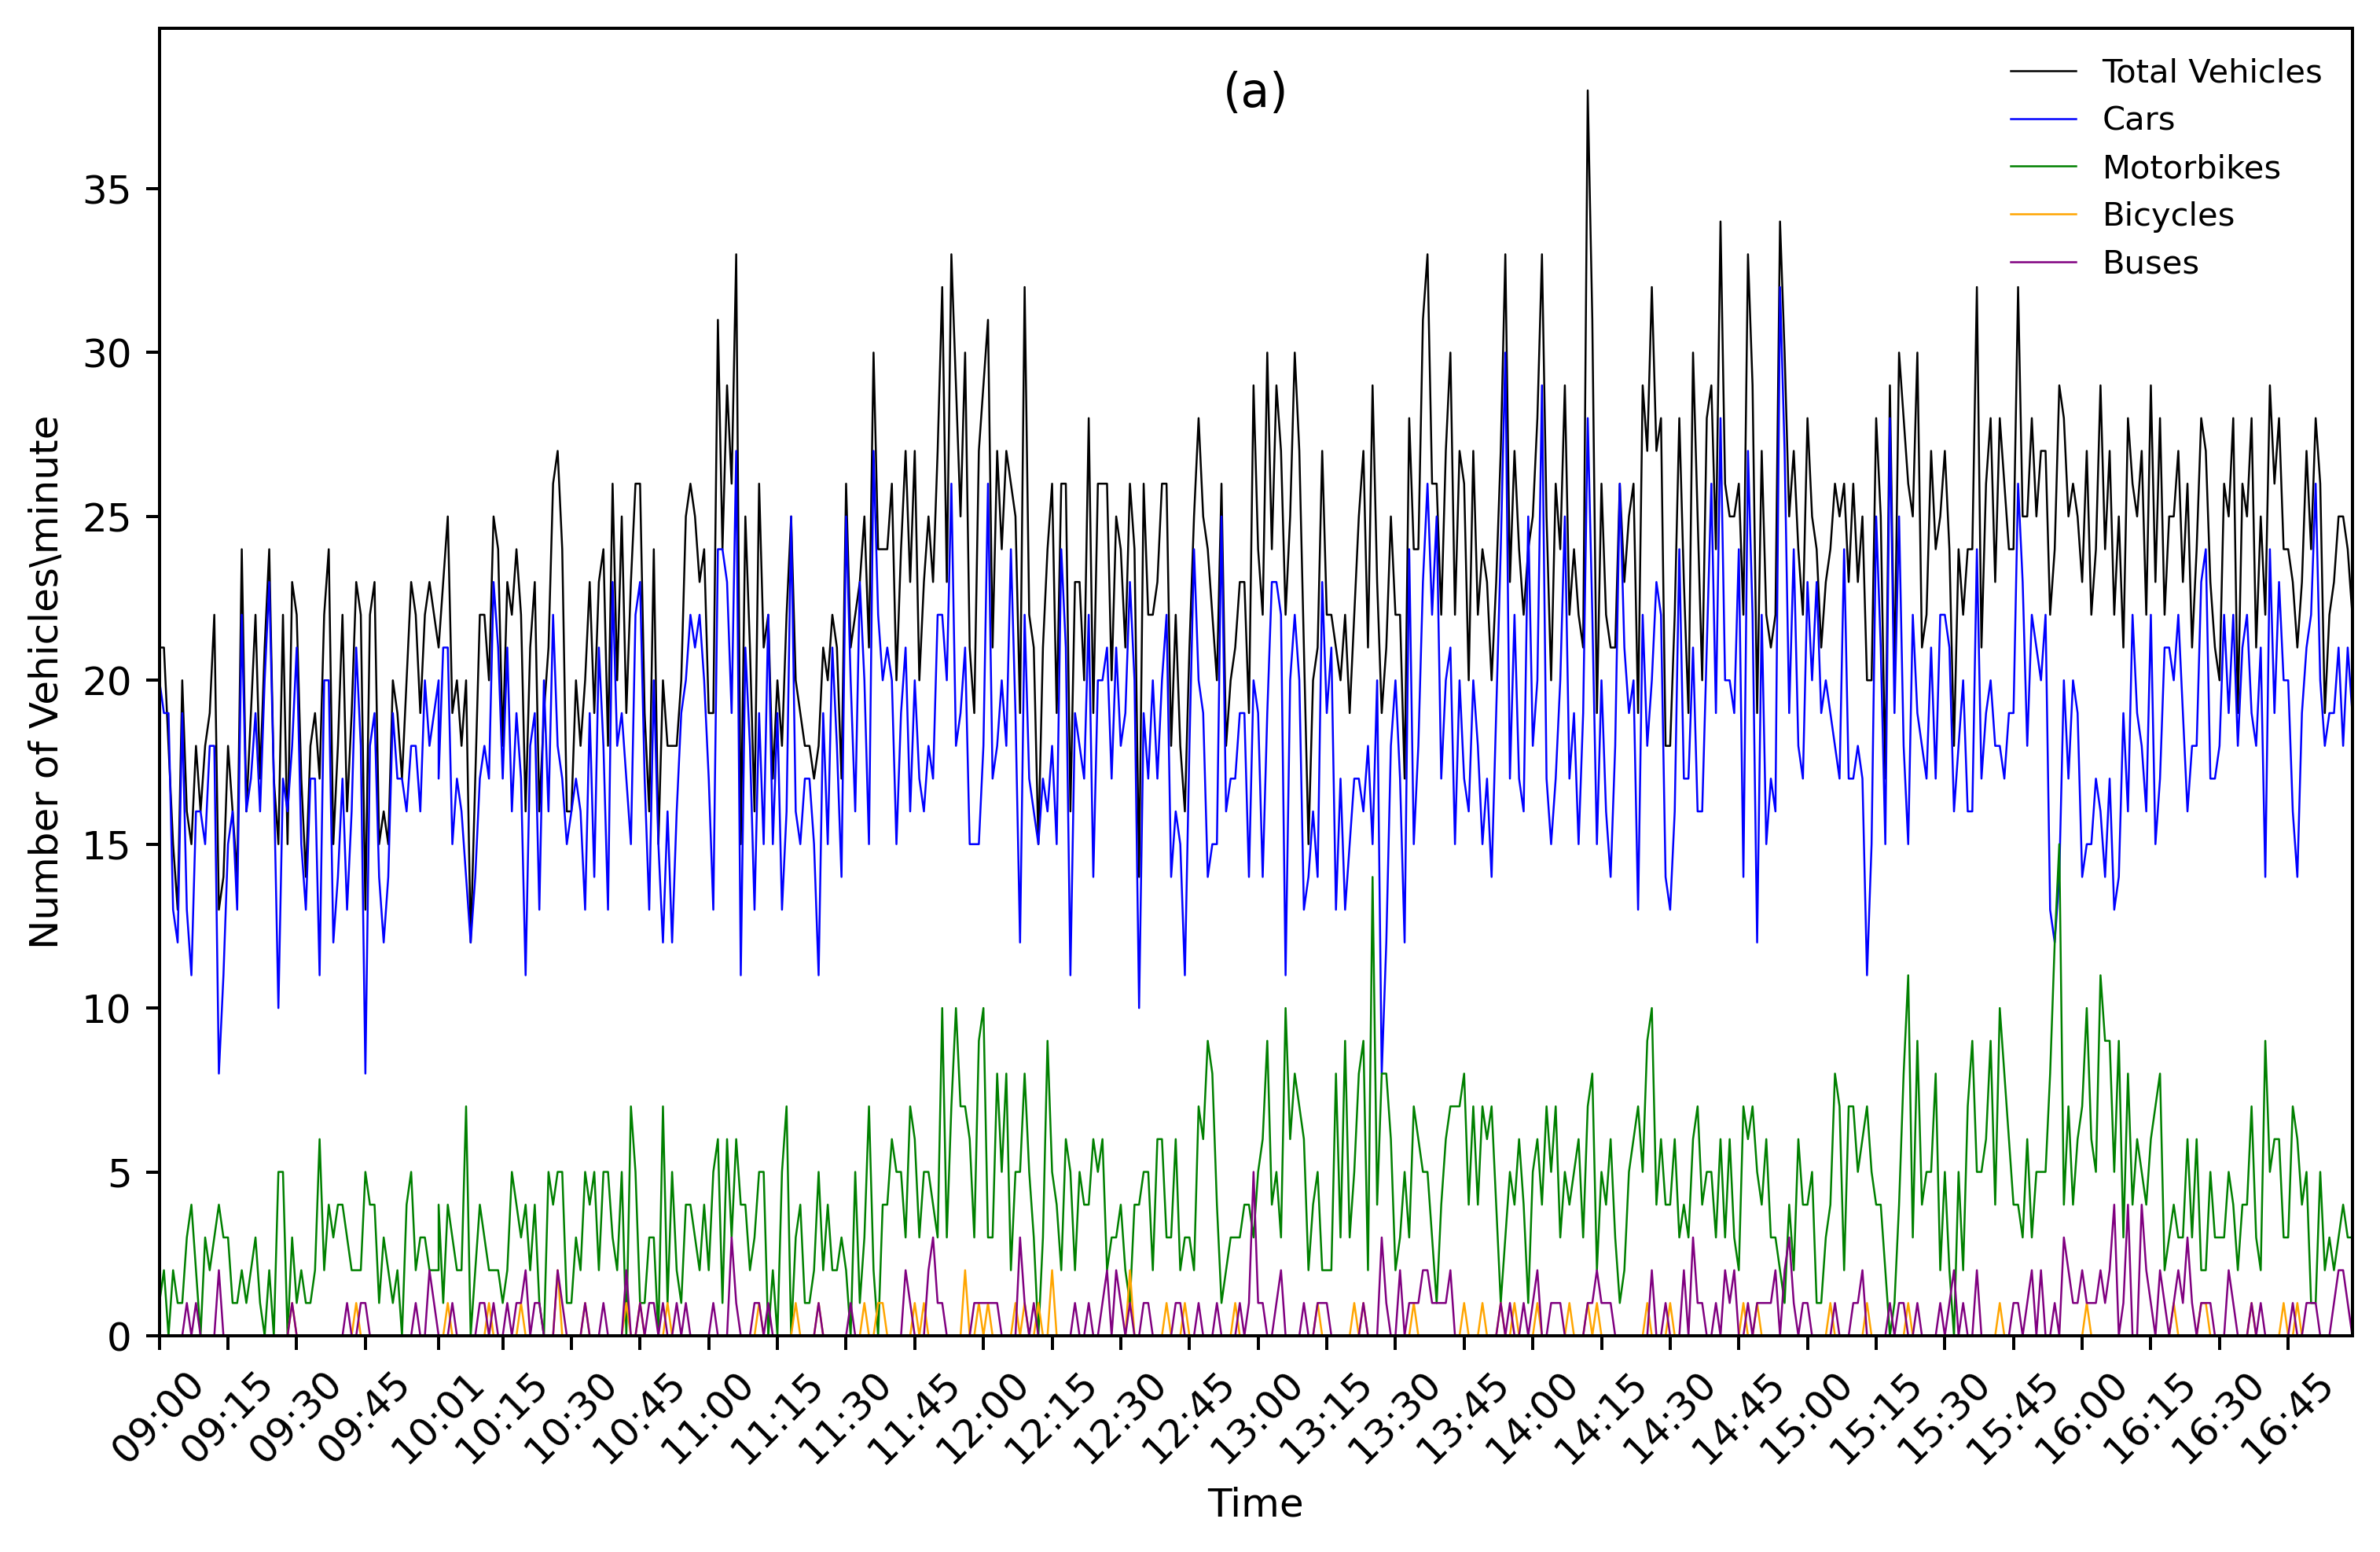

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume Monday_df is your DataFrame

# Extract relevant columns for plotting
time_column = 'Ref Time'
vehicle_count_column = 'Vehicles Count\\ minute'
cars_column = 'Cars'
motorbike_column = 'Motorbike'
bicycle_column = 'Bicycle'
bus_column = 'Bus'

# Replace NaN and inf values with 0 in the columns you are plotting
columns_to_replace = [vehicle_count_column, cars_column, motorbike_column, bicycle_column, bus_column]
Monday_df[columns_to_replace] = Monday_df[columns_to_replace].replace([np.inf, -np.inf, np.nan], 0)

# Convert 'Ref Time' to datetime format
Monday_df[time_column] = pd.to_datetime('2023-01-01 ' + Monday_df[time_column].astype(str))  # Assuming a dummy date

# Plotting
plt.figure(figsize=(10, 6), dpi=360)

plt.plot(Monday_df[time_column], Monday_df[vehicle_count_column].astype(int), label='Total Vehicles', color='black', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[cars_column].astype(int), label='Cars', color='blue', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[motorbike_column].astype(int), label='Motorbikes', color='green', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[bicycle_column].astype(int), label='Bicycles', color='orange', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[bus_column].astype(int), label='Buses', color='purple', linestyle='-', linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Number of Vehicles\minute')
plt.legend(loc='upper right', frameon=False, fontsize='small')
plt.grid(False)

# Add '(a)' on the top middle
plt.text(0.5, 0.95, '(a)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Set x-axis and y-axis limits to span the whole figure box
plt.xlim(Monday_df[time_column].iloc[0], Monday_df[time_column].iloc[-1])
plt.ylim(0, None)

# Set x-axis ticks every 15 minutes
plt.xticks(Monday_df[time_column][::15], Monday_df[time_column][::15].dt.strftime('%H:%M'), rotation=45)

# Save the plot to a file with 360dpi resolution
plt.savefig('Monday vehicle count.png', dpi=360)

# Show the plot
plt.show()

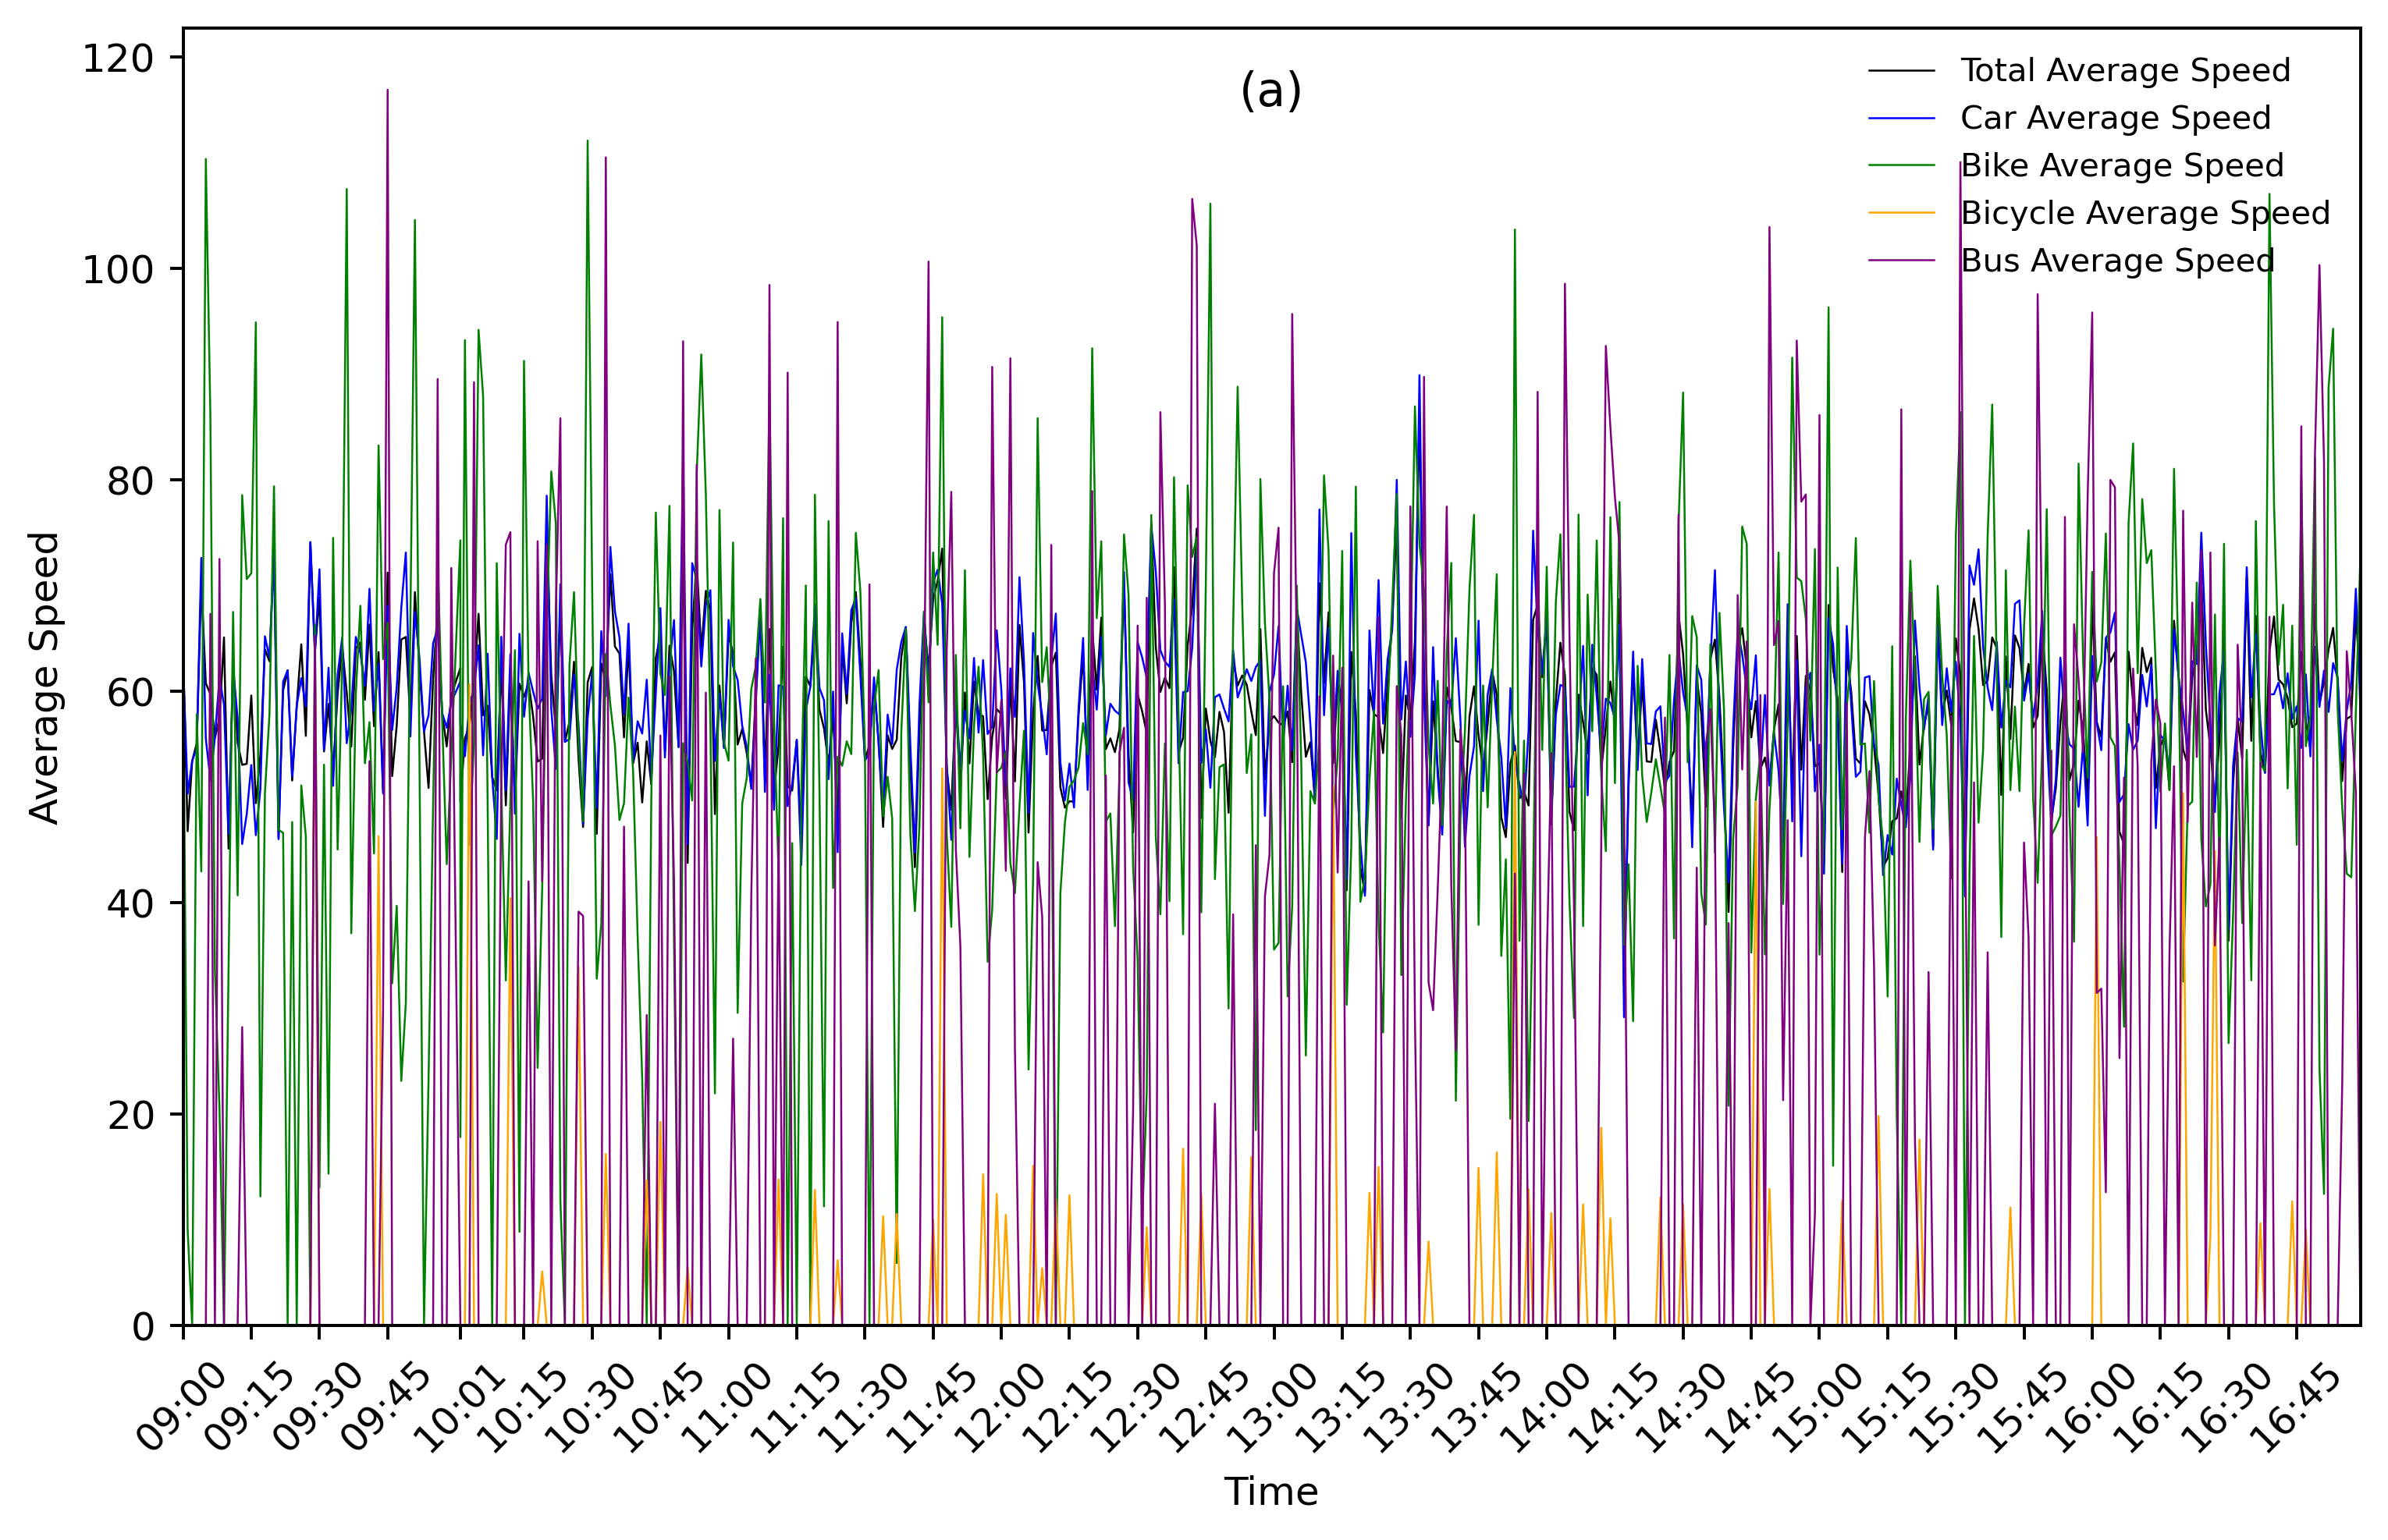

In [6]:
# Extract relevant columns for plotting
time_column = 'Ref Time'
avg_speed_column = 'Avg Speed\\ minute'
car_avg_speed_column = 'Car Avg Speed'
motorbike_avg_speed_column = 'Bike Avg Speed '
bicycle_avg_speed_column = 'Bicycle Avg Speed'
bus_avg_speed_column = 'Bus Avg Speed'

# Replace NaN and inf values with 0 in the columns you are plotting
columns_to_replace = [avg_speed_column, car_avg_speed_column, motorbike_avg_speed_column, bicycle_avg_speed_column, bus_avg_speed_column]
Monday_df[columns_to_replace] = Monday_df[columns_to_replace].replace([np.inf, -np.inf, np.nan], 0)

# Convert 'Ref Time' to datetime format
Monday_df[time_column] = pd.to_datetime('2023-01-01 ' + Monday_df[time_column].astype(str))  # Combining with a dummy date

# Plotting
plt.figure(figsize=(10, 6), dpi=360)

plt.plot(Monday_df[time_column], Monday_df[avg_speed_column], label='Total Average Speed', color='black', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[car_avg_speed_column], label='Car Average Speed', color='blue', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[motorbike_avg_speed_column], label='Bike Average Speed', color='green', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[bicycle_avg_speed_column], label='Bicycle Average Speed', color='orange', linestyle='-', linewidth=0.5)
plt.plot(Monday_df[time_column], Monday_df[bus_avg_speed_column], label='Bus Average Speed', color='purple', linestyle='-', linewidth=0.5)

plt.xlabel('Time')
plt.ylabel('Average Speed')
plt.legend(loc='upper right', frameon=False, fontsize='small')
plt.grid(False)

# Add '(a)' on the top middle
plt.text(0.5, 0.95, '(a)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Set x-axis and y-axis limits to span the whole figure box
plt.xlim(Monday_df[time_column].iloc[0], Monday_df[time_column].iloc[-1])
plt.ylim(0, None)

# Set x-axis ticks every 15 minutes
plt.xticks(Monday_df[time_column][::15], Monday_df[time_column][::15].dt.strftime('%H:%M'), rotation=45)

# Save the plot to a file with 360dpi resolution
plt.savefig('Monday Average Speed.png', dpi=360)

# Show the plot
plt.show()

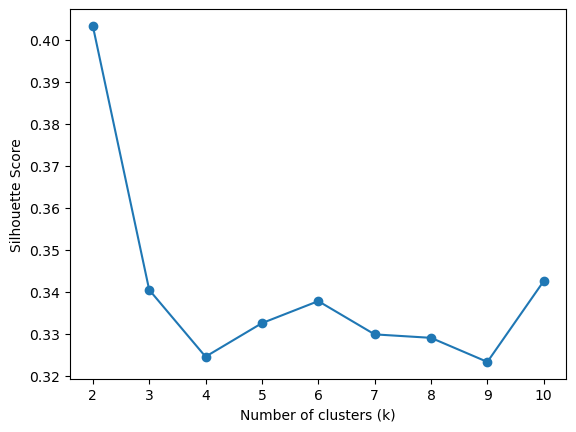

Optimal number of clusters (k) based on Silhouette Score: 2


In [7]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

X1 = Monday_df.iloc[:, 1:3].values

# Calculate Silhouette Score for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    silhouette_scores.append(silhouette_score(X1, kmeans.labels_))

# Plot the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the k with the highest Silhouette Score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters (k) based on Silhouette Score: {best_k}')

X1_selected shape: (480, 2)


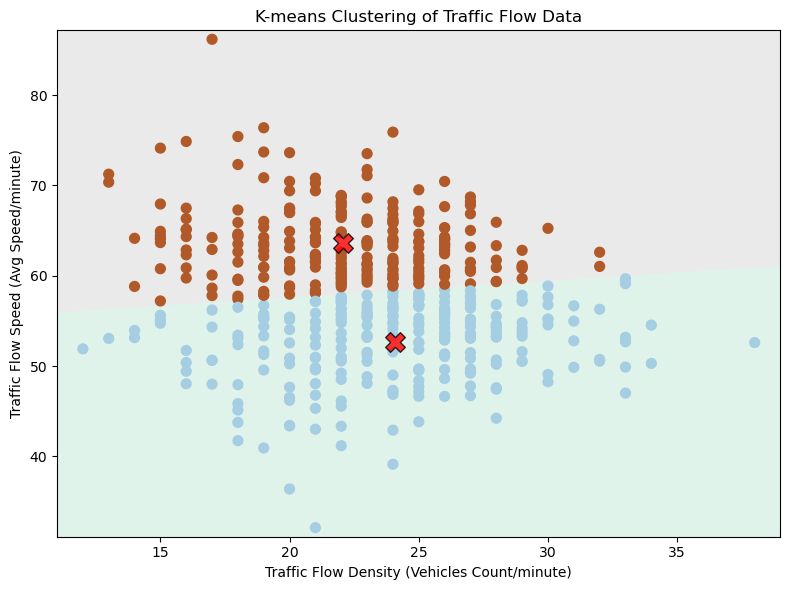

In [15]:
X1_selected = Monday_df[['Vehicles Count\ minute', 'Avg Speed\ minute']].values

# Print the shape of X1_selected for debugging
print("X1_selected shape:", X1_selected.shape)

# K-means clustering with 10 clusters
algorithm = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X1_selected)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

# Create a meshgrid for decision boundaries
h = 0.02
x_min, x_max = X1_selected[:, 0].min() - 1, X1_selected[:, 0].max() + 1
y_min, y_max = X1_selected[:, 1].min() - 1, X1_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Ensure the input for prediction has two columns
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict cluster labels for meshgrid points
Z = algorithm.predict(meshgrid_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.clf()
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.4)

# Scatter plot of data points
plt.scatter(x=X1_selected[:, 0], y=X1_selected[:, 1], c=labels1, s=50, cmap=plt.cm.Paired)

# Plot cluster centroids
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=200, c='red', marker='X', edgecolors='black', linewidths=1, alpha=0.8)

plt.xlabel('Traffic Flow Density (Vehicles Count/minute)'), plt.ylabel('Traffic Flow Speed (Avg Speed/minute)')

# Add a title
plt.title('K-means Clustering of Traffic Flow Data')

plt.grid(False)
plt.tight_layout()

plt.savefig('kmeans_clustering.png', dpi=300)
plt.show()

In [14]:
X1_selected = Monday_df[['Vehicles Count\ minute', 'Avg Speed\ minute']].values

# K-means clustering with 10 clusters
algorithm = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
algorithm.fit(X1_selected)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

# Calculate the average number of vehicles across all clusters
average_vehicles = len(X1_selected) / 10  # Total number of data points divided by the number of clusters

# Create a DataFrame to store centroids and average number of vehicles
centroids_df = pd.DataFrame(centroids1, columns=['Centroid_Vehicles_Count', 'Centroid_Avg_Speed'])

# Add a column for the average number of vehicles
centroids_df['Average_Number_of_Vehicles'] = average_vehicles

# Print the DataFrame
print(centroids_df)

# Plotting
plt.figure(1, figsize=(15, 7))
plt.clf()

# Rest of the plotting code...

plt.show()

   Centroid_Vehicles_Count  Centroid_Avg_Speed  Average_Number_of_Vehicles
0                24.085366           52.623981                        48.0
1                22.059829           63.662428                        48.0


<Figure size 1500x700 with 0 Axes>